<a href="https://colab.research.google.com/github/RaniaBZ/Feynn_labs-project2/blob/main/Mcdonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.mosaicplot import mosaic

#2. Load Data

In [ ]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [30]:
mcdonalds.head()

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Age  Like_n  
0        0           0   61       0  
1        0           0   51       5  
2        1           0   62       6  
3        0           1   69       3  
4        1           0   49       5

In [34]:
np.shape(mcdonalds)

(1453, 13)

In [33]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
 11  Age         1453 non-null   int64
 12  Like_n      1453 non-null   int8 
dtypes: int64(12), int8(1)
memory usage: 137.8 KB


In [35]:
mcdonalds.describe()

yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        disgusting          Age       Like_n  
count  1453.000000  1453.000000  1453.000000  
mean      0.242946    44.604955     1.363386  
std       0.429010    14.221178     3.446175  
min       0.000000    18.000000    -4.000000  
25%       0.000000    33.000000    -2.000000  
50%       0.000000    45.000000     3.000000  
75%       0.000000    57.000000     4.000000  
max       1.000000    71.000000     6.000000

#3. Explore Data

In [ ]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


#4. Data Preparation

In [ ]:
# Convert Yes/No to 1/0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-5-1b110419bbda>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


#5. PCA

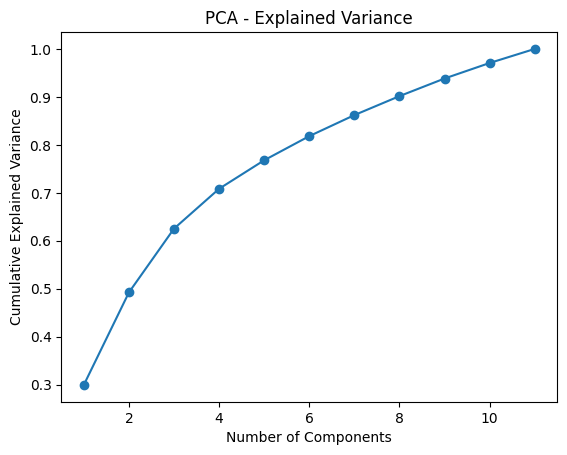

In [ ]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

#6. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


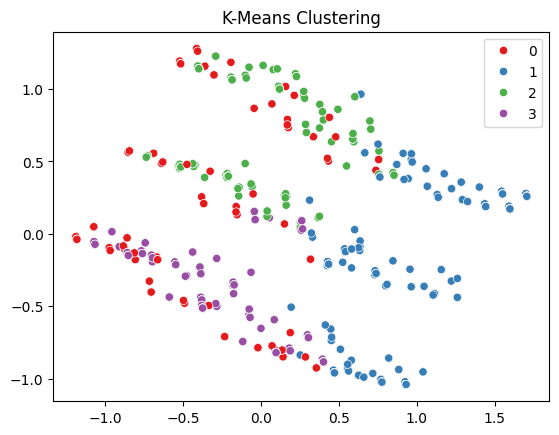

In [ ]:
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# K-Means clustering
best_k = 4  # Determined from plots and analysis
kmeans = KMeans(n_clusters=best_k, random_state=1234)
clusters = kmeans.fit_predict(MD_x_scaled)

# Plot K-Means results
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

#7. Gaussian Mixture Model (GMM)

In [ ]:
gmm = GaussianMixture(n_components=best_k, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x_scaled)

# Compare clustering results
pd.crosstab(clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

GMM       0    1   2    3
KMeans                   
0       111   12   4   48
1         0  110  34  216
2       222    5  18   73
3       346    7   5  242

#8. Hierarchical Clustering

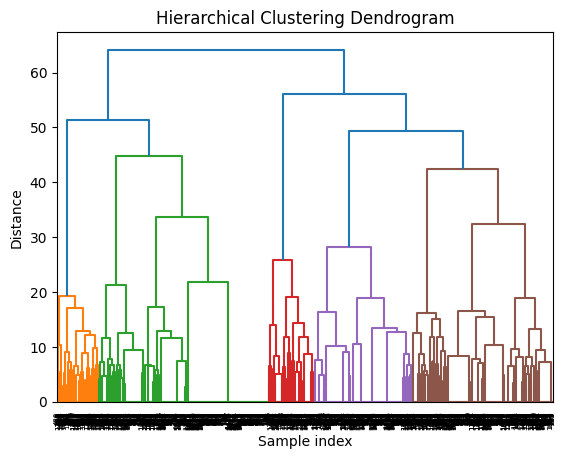

In [ ]:
# Compute the distance matrix
distance_matrix = pdist(MD_x_scaled, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#9. Regression with Clustering

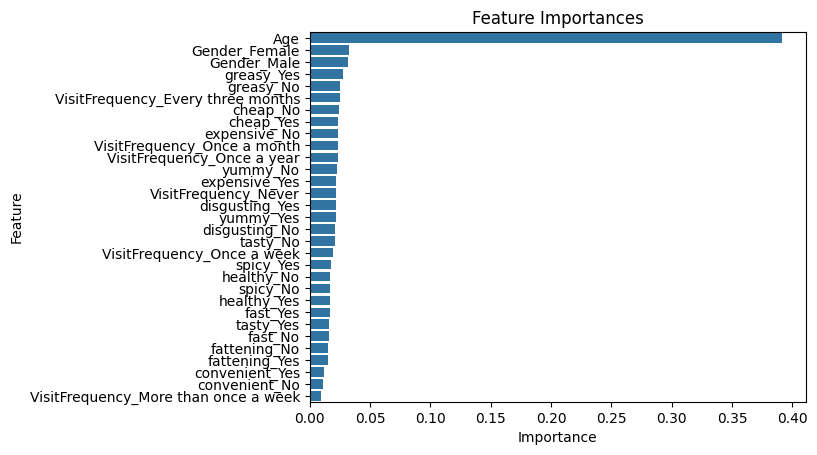

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert 'Like' into numerical values
mcdonalds['Like_n'] = 6 - mcdonalds['Like'].astype('category').cat.codes

# Drop 'Like' and 'Like_n' for feature matrix X
X = mcdonalds.drop(['Like', 'Like_n'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X)

# Target variable
y = mcdonalds['Like_n']

# Fit a RandomForest model to cluster data
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


#10. Pair Plot

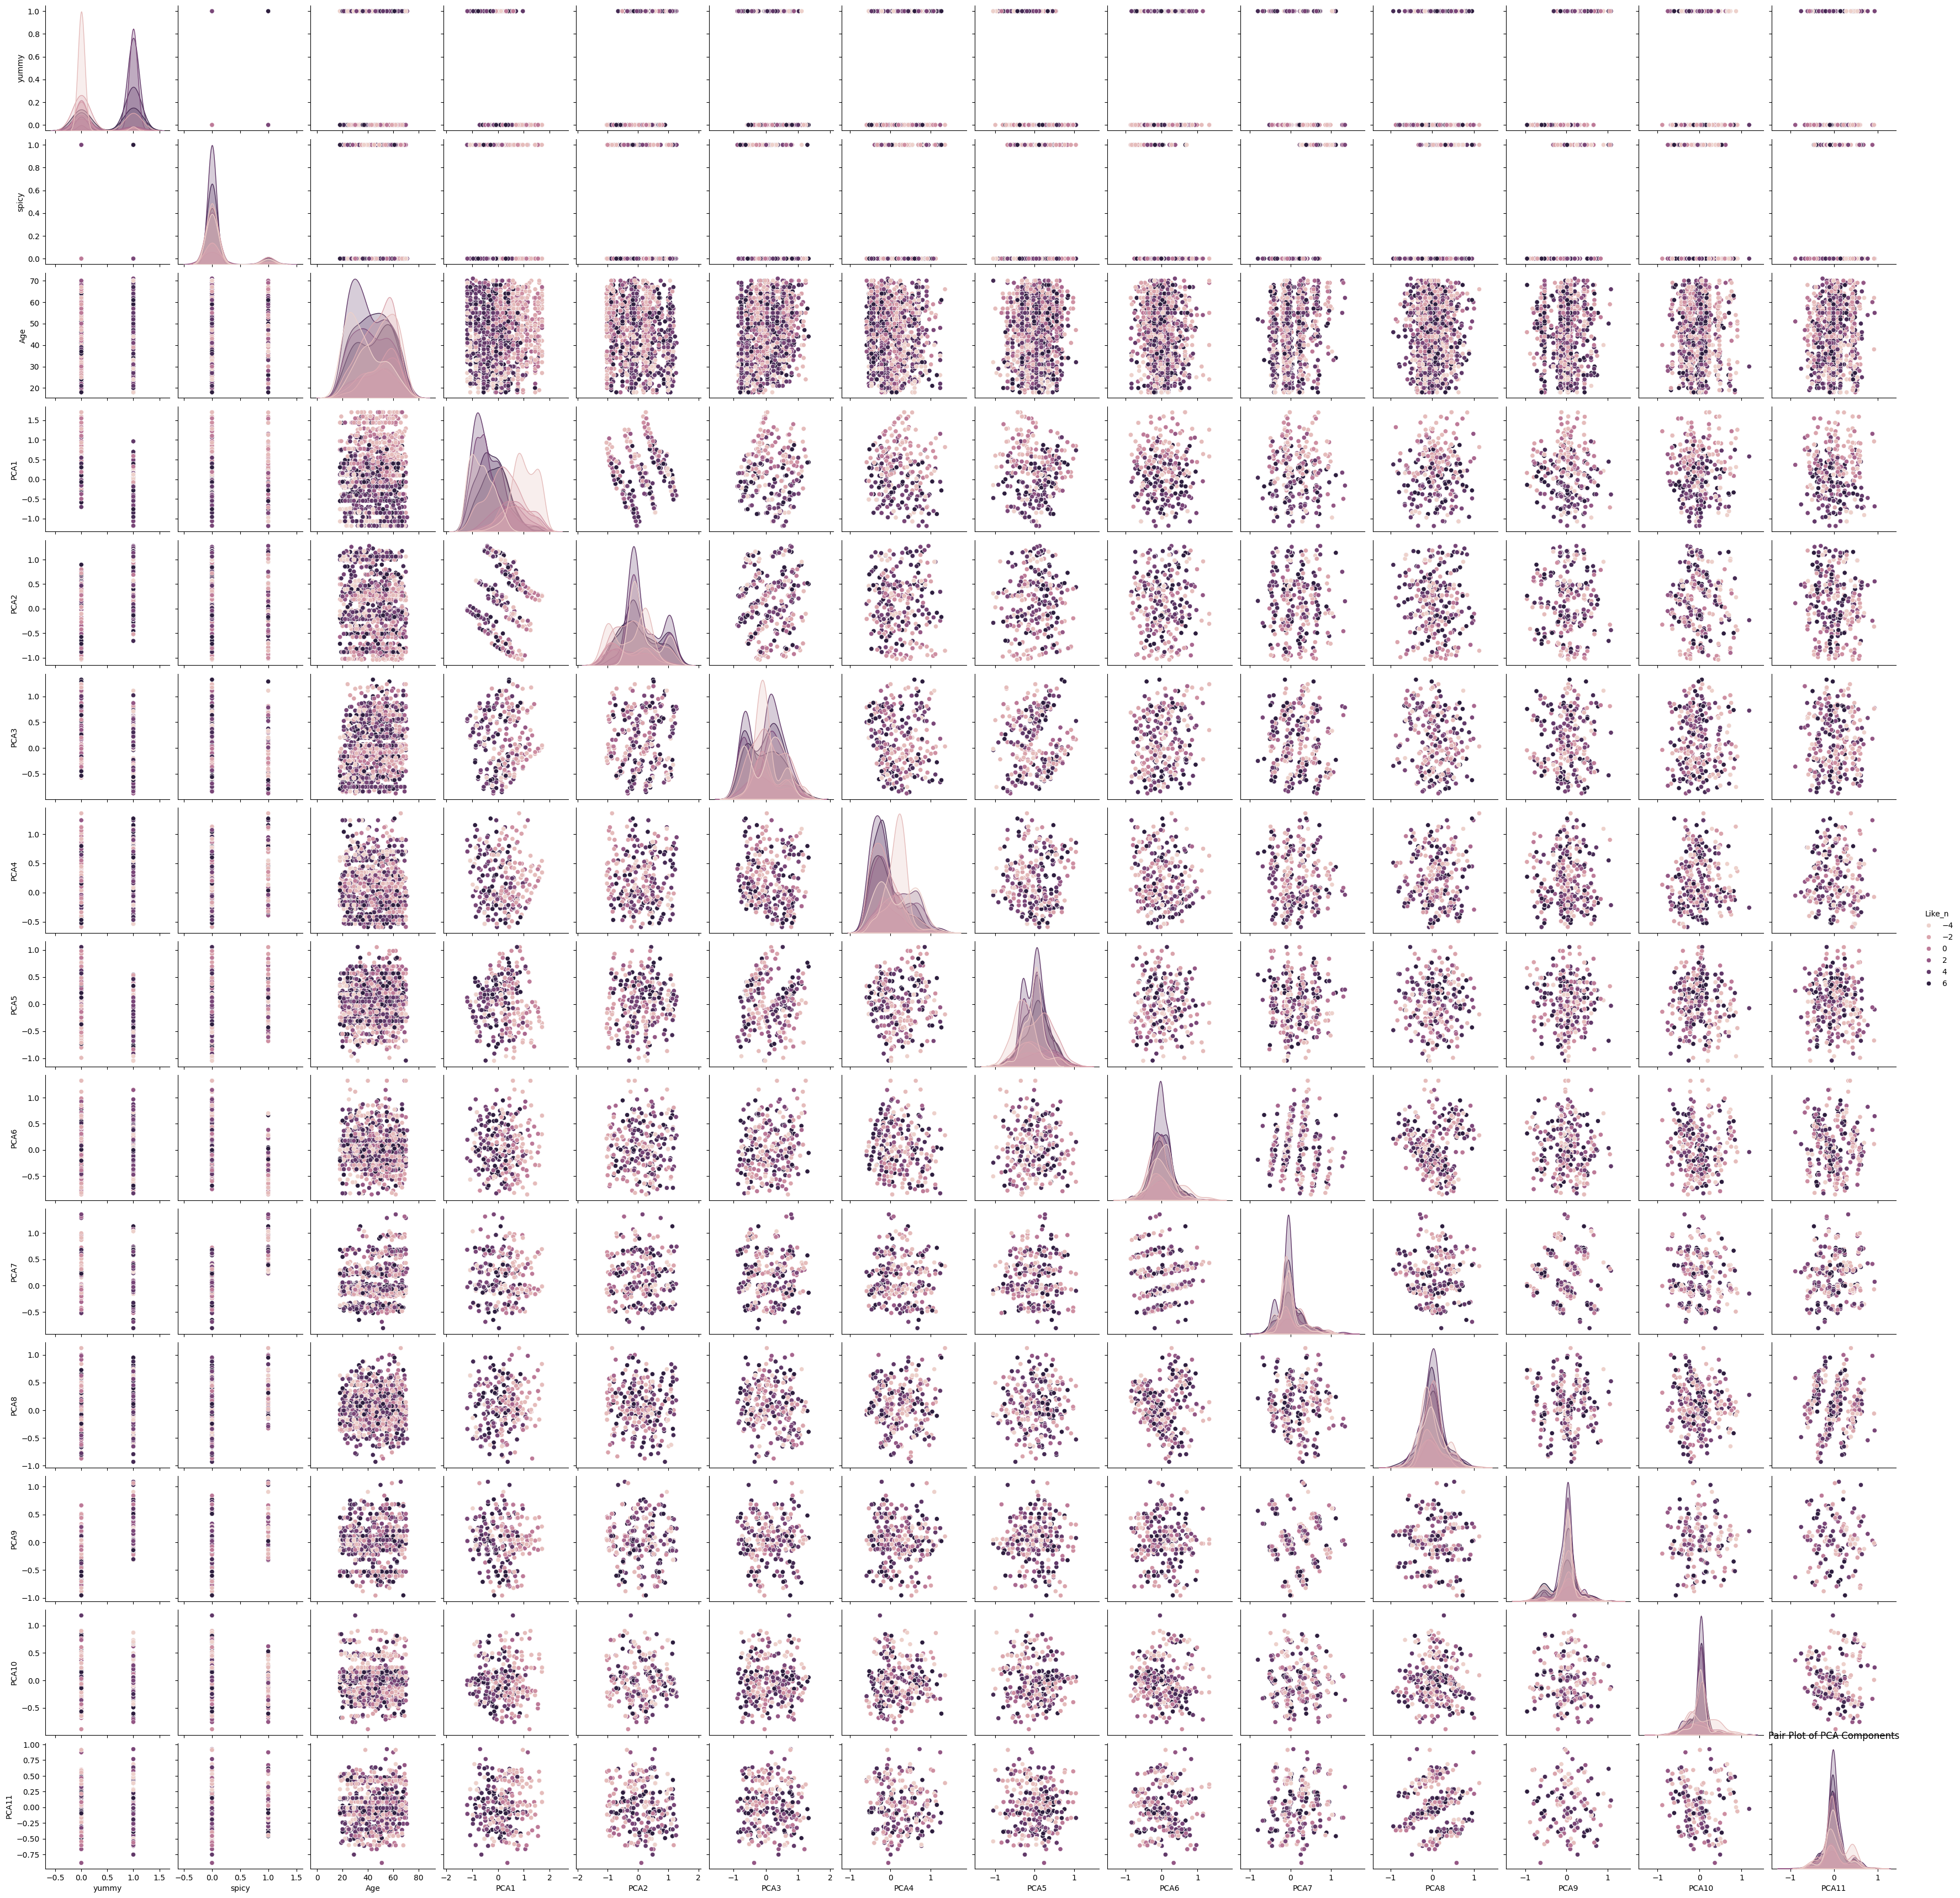

In [ ]:
df_pca = mcdonalds.copy()
df_pca = pd.concat([df_pca, pd.DataFrame(data=MD_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])], axis=1)
sns.pairplot(df_pca, hue='Like_n')
plt.title('Pair Plot of PCA Components')
plt.show()

#11. Heat map

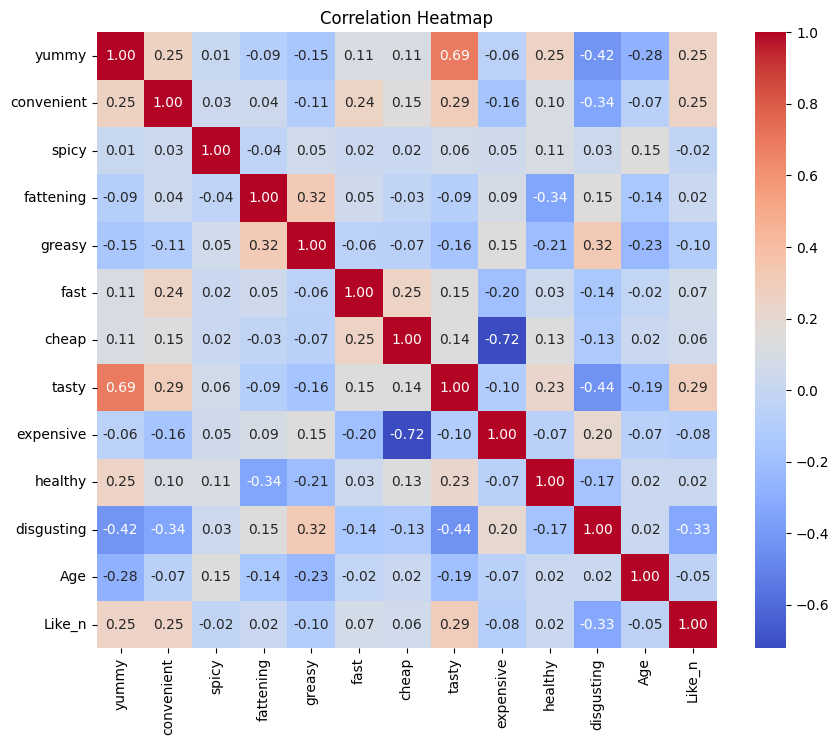

In [27]:
# Convert categorical columns to numeric (if not already done)
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_columns:
    mcdonalds[col] = mcdonalds[col].replace({'Yes': 1, 'No': 0})

# Drop non-numeric columns (if necessary)
mcdonalds = mcdonalds.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = mcdonalds.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#12. Box Plot

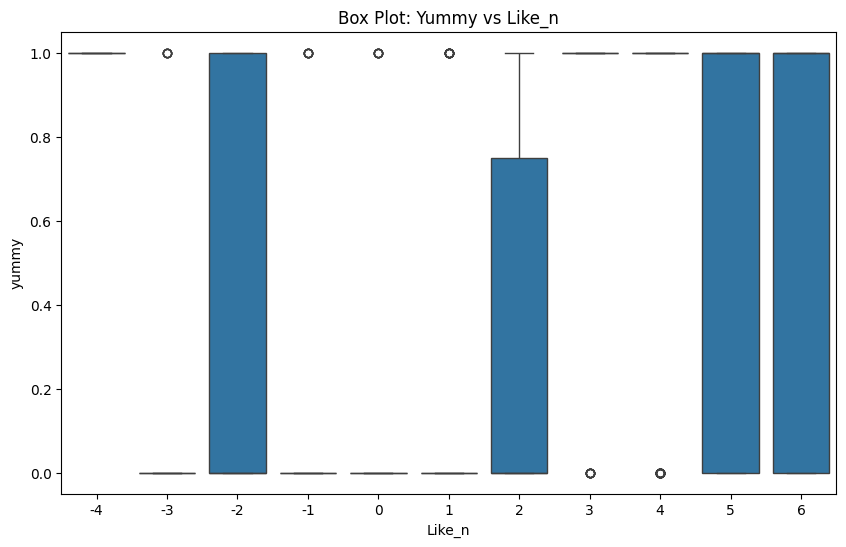

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Like_n', y='yummy', data=mcdonalds)
plt.title('Box Plot: Yummy vs Like_n')
plt.show()